# Analiza glavnih komponenti

In [1]:
import pandas as pd

In [2]:
import numpy as np

## Podaci

In [3]:
df = pd.read_csv("../data/iris.csv")

In [4]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = df.drop("Species", axis = 1)
y = df["Species"]

## Analiza

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
# pca = PCA(n_component=0.9)

*PCA* može da instanciramo tako navodimo koliki deo varijanse želimo da pokriju nove komponente. Ako *PCE* instanciramo bez parametara, tada se kreiraju sve moguće komponente.

## Preprocesiranje

Kako bi se izvršila analiza, potrebno je da svi atributi imaju srednju vrednost $0$. U ovu svrhu, podatke možemo da standardizujemo.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
X_scaled

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [12]:
# predsulvom je da atributi imaju prosek 0
# mozemo da standardizujemo

In [13]:
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

In [14]:
pca_names = [f"pca_{i}" for i in range(len(X.columns))]

In [15]:
x_pca = pd.DataFrame(x_pca, columns=pca_names)

In [16]:
x_pca

,pca_0,pca_1,pca_2,pca_3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


## Analiza

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()
# pca = PCA(n_component=0.9)

*PCA* može da instanciramo tako navodimo koliki deo varijanse želimo da pokriju nove komponente. Ako *PCE* instanciramo bez parametara, tada se kreiraju sve moguće komponente.

In [19]:
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

In [20]:
pca_names = [f"pca_{i}" for i in range(len(X.columns))]
x_pca = pd.DataFrame(x_pca, columns=pca_names)
x_pca

,pca_0,pca_1,pca_2,pca_3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


Možemo da vidimo kako se računaju nove komponente:

In [21]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

Dake:
$$ PCA_{0} = 0.52 * S_{l} - 0.26 * S_{w} + 0.58 * P_{l} + 0.56 * P_{w} $$
$$ PCA_{1} = 0.38 * S_{l} - 0.92 * S_{w} + 0.02 * P_{l} + 0.06 * P_{w} $$
itd.

Takođe, možemo da vidimo koji procenat varijanse pokriva koja komponenta:

In [22]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Dakle ${PCA}_{0}$ pokriva $72.9\%$, ${PCA}_{1}$ pokriva $22.8\%$, itd.

## Vizualizacija

Iz ovih vizualizacija može da se donese zaključak koliko nam komponenti trebaju.

In [23]:
from matplotlib import pyplot as plt

<BarContainer object of 4 artists>

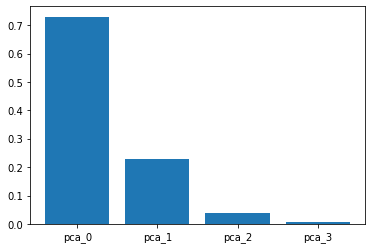

In [24]:
plt.bar(pca_names, pca.explained_variance_ratio_)

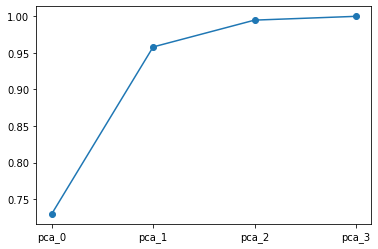

In [25]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_names, cumulative_variance_ratio, marker = 'o')

Svođenje atributa na dve dimenzije:

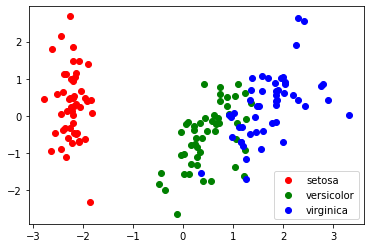

In [26]:
colors = ["red", "green", "blue"]
class_names = y.unique()
for i, class_name in enumerate(class_names):
    class_instances = x_pca.iloc[y[y == class_name].index]
    plt.scatter(class_instances["pca_0"], class_instances["pca_1"], c=colors[i], label=class_name)
    
plt.legend(loc="best")